### Marine Acoustics Workbook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Figures appear in notebook inline
%matplotlib inline


In [2]:
def slice_data(data, window_size, step_size):
    """Slice 1D array into windows with a given step size"""
    nrows = ((data.size-window_size)//step_size)+1
    ncol = window_size
    old_stride = data.strides[0]

    # Add .copy() for a writable array
    sliced_view = np.lib.stride_tricks.as_strided(data, shape=(nrows,ncol), strides=(step_size*old_stride,old_stride), writeable=False)
    
    return sliced_view


def plot_waveform(signal_data, sample_freq, title='Audio Waveform', xlabel='Time (s)', ylabel='Amplitude'):
    """Plot the signal waveform"""
    
    # Calculate time in seconds
    time = np.linspace(0, len(signal_data) / sample_freq, num=len(signal_data))

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(time, signal_data)


def plot_spectrogram(signal_data, sample_freq, title='Spectrogram', xlabel='Time (s)', ylabel='Frequency (Hz)'):
    """Plot the signal spectrogram"""

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.specgram(signal_data, Fs=sample_freq)



### Read .wav audio

In [3]:
# File path to .wav file
audio_file_path = "../data/humpback.wav"

# Read the .wav file
sample_freq, raw_signal = wavfile.read(audio_file_path)


### Plot the audio waveform

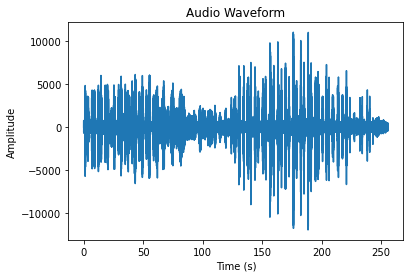

In [4]:
plot_waveform(raw_signal, sample_freq)


### Plot the spectrogram

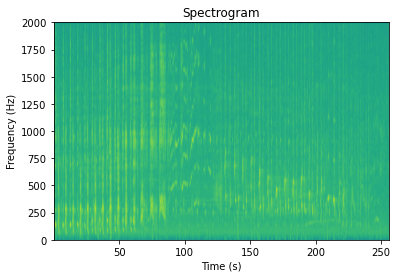

In [5]:
plot_spectrogram(raw_signal, sample_freq)


### Slice signal into windows

In [6]:
# Set window size and step size
WINDOW_SIZE = 5000
STEP_SIZE = 5000

# Create view of sliced signal
sliced_view = slice_data(raw_signal, WINDOW_SIZE, STEP_SIZE)
print(sliced_view)


[[   -2     9   -60 ...  2097  3385  2094]
 [  569  -898   682 ...   350   180   -66]
 [   83   206    14 ... -1161 -1964 -2593]
 ...
 [  240    15  -140 ...   -44   -37  -131]
 [ -109  -171  -320 ...    53    35  -234]
 [  -65    79    31 ...   149    65   -41]]
